<a href="https://colab.research.google.com/github/AndreaCamilloni/Online-learning-application-21-22/blob/main/mab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Environment():
    def __init__(self,n_arms,probabilities):
        self.n_arms = n_arms
        self.probabilities = probabilities

    def round(self,pulled_arm):
        reward = np.random.binomial(1, self.probabilities[pulled_arm])
        return reward

In [ ]:
class Learner:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.t = 0
        self.rewards_per_arm = x = [[] for i in range(n_arms)]
        self.collected_rewards = np.array([])

    def update_observations(self,pulled_arm, reward):
        self.rewards_per_arm[pulled_arm].append(reward)
        self.collected_rewards = np.append(self.collected_rewards,reward)

In [ ]:
class TS_Learner(Learner):
    def __init__(self,n_arms):
        super().__init__(n_arms)
        self.beta_parameters = np.ones((n_arms,2))

    def pull_arm(self):
        idx = np.argmax(np.random.beta(self.beta_parameters[:,0],self.beta_parameters[:,1]))
        return idx

    def update(self,pulled_arm,reward):
        self.t+=1
        self.update_observations(pulled_arm,reward)
        self.beta_parameters[pulled_arm,0] = self.beta_parameters[pulled_arm,0] + reward
        self.beta_parameters[pulled_arm,1] = self.beta_parameters[pulled_arm,1] + 1.0 - reward

In [ ]:
class Greedy_Learner(Learner):
    def __init__(self,n_arms):
        super().__init__(n_arms)
        self.expected_rewards = np.zeros(n_arms)

    def pull_arm(self):
        if(self.t < self.n_arms):
            return self.t
        
        idxs = np.argwhere(self.expected_rewards == self.expected_rewards.max()).reshape(-1)
        pulled_arm = np.random.choice(idxs)
        return pulled_arm

    def update(self,pulled_arm,reward):
        self.t+=1
        self.update_observations(pulled_arm, reward)
        self.expected_rewards[pulled_arm] = (self.expected_rewards[pulled_arm]*(self.t -1) + reward) / self.t
        

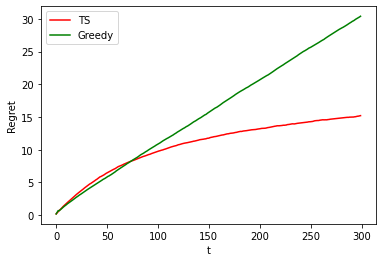

In [ ]:
n_arms = 4
p = np.array([0.15,0.1,0.1,0.35]) #bernulli distribution for the reward function of the arms
opt = p[3]

T = 300

n_experiments = 1000
ts_rewards_per_experiment = []
gr_rewards_per_experiment = []

for e in range(0,n_experiments):
    env = Environment(n_arms, p)
    ts_learner = TS_Learner(n_arms)
    gr_learner = Greedy_Learner(n_arms)
    for t in range(0,T):
        #Thompson sampling learner
        pulled_arm = ts_learner.pull_arm()
        reward = env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)
        #Greedy learner
        pulled_arm = gr_learner.pull_arm()
        reward = env.round(pulled_arm)
        gr_learner.update(pulled_arm, reward)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    gr_rewards_per_experiment.append(gr_learner.collected_rewards)


plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(np.cumsum(np.mean(opt-ts_rewards_per_experiment, axis=0)), color = 'r')
plt.plot(np.cumsum(np.mean(opt-gr_rewards_per_experiment, axis=0)), color = 'g')
plt.legend(["TS","Greedy"])
plt.show()